<h1>Section 1: Dataset</h1>

The dataset I chose was a set from Kaggle called "1000 Cameras Dataset" (https://www.kaggle.com/datasets/crawford/1000-cameras-dataset). This dataset contains information about a 1000 cameras and 13 of their properties, including their release date, max resolution, focus range, storage, dimensions, price, and more. I chose this dataset since I'm a photographer and have had a passion for photography for years. Having a good camera is important in this hobby (plus, the nerd side of me gets excited to know the technicalities of my cameras). I'm looking for a new camera and want to experimenting with new styles of photography -- this dataset has all the information I need to narrow down some models that I can learn more about and possibly even buy and use. 


In [2]:
import pandas as pd 
df = pd.read_csv("camera_dataset.csv")
df

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,Toshiba PDR-M65,2001,2048.0,1024.0,3.0,38.0,114.0,10.0,10.0,8.0,320.0,120.0,62.0
1034,Toshiba PDR-M70,2000,2048.0,1024.0,3.0,35.0,105.0,80.0,9.0,16.0,390.0,116.0,62.0
1035,Toshiba PDR-M71,2001,2048.0,1024.0,3.0,35.0,98.0,80.0,10.0,8.0,340.0,107.0,62.0
1036,Toshiba PDR-M81,2001,2400.0,1200.0,3.0,35.0,98.0,80.0,10.0,16.0,340.0,107.0,62.0


In [3]:
print("Number of rows: " + str(len(df['Model'])))

Number of rows: 1038


<h1>Section 2: Exploratory Data Analysis</h1> 

The factors I care most about when purchasing a camera is resolution, release date, storage included, and price. Resolution affects the quality of my photos. Cameras released in the 2000s and after have the style and quality (like film and grain) that I prefer in my photographs. I also like a camera with a high amount of storage, because I won't run out of camera memory often, which means I can take photos without worrying about losing memory in the middle of a shoot. Finally, price matters because I have a low budget (as does your average college student). Also, most of the time, a cheaper model has just as good functionality as a super-expensive model. 

Let's take a look at the descriptive statistics for these factors to get the general idea of the functionality of the camera models in these datasets.

In [6]:
#avg storage included
avg_storage_included = df['Storage included'].mean().item()
avg_storage_included

17.44787644787645

In [7]:
#max storage included
max_storage_included = df['Storage included'].max().item()
max_storage_included

450.0

In [100]:
std_storage_included = df['Storage included'].std().item()
std_storage_included

27.440655076760194

On average, the 1038 camera models in the dataset have storage of about 17 GB, with a standard deviation of 27.44 GB. The camera in this dataset that offers the most storage offers 450 GB. 

In [8]:
#avg max resolution
avg_max_res = df['Max resolution'].mean().item()
avg_max_res

2474.6724470134873

In [9]:
#max of max resolution
maximum_max_res = df['Max resolution'].max().item()
maximum_max_res

5616.0

In [101]:
std_max_res = df['Max resolution'].std().item()
std_max_res

759.5136078905122

On average, the 1038 camera models in the dataset have a max resolution of about 2474 pixels per inch (PPI), with a standard deviation of 759.51 PPI. The camera in this dataset that offers the greatest max resolution is 5616 PPI. 

In [97]:
avg_price = df['Price'].mean().item()
avg_price

457.38439306358384

In [98]:
med_price = df['Price'].median().item()
med_price

199.0

In [102]:
std_price = df['Price'].std().item()
std_price

760.4529176412254

In [103]:
max_price = df['Price'].max().item()
max_price

7999.0

On average, the 1038 camera models in the dataset have a price of 457.38 dollars, with a standard deviation of 760.45 dollars. The camera in this dataset that is the most expensive is 7999.00 dollars, but it is likely an outlier given that the median price of the cameras is 199.00 dollars. 

Overall, these cameras offer a high max resolution, which means some good quality photos, but a wide range of how much storage they can offer. The price also varies greatly. We will have to dive deeper into the data and obtain some visualizations to put these factors together and determine which cameras can give the best photos, and are worth purchasing. 

<h1>Section 3: Exploratory Data Visualization</h1>

With the following graphs we will first determine the top 100 cameras with the lowest price. Then we will further filter those models by release date, max resolution, and storage included.

In [57]:
df_price = df.nsmallest(100, 'Price')
df_price

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
347,JVC GC-QX3HD,2001,2032.0,1024.0,3.0,37.0,86.0,50.0,2.0,8.0,320.0,111.0,14.0
348,JVC GC-QX5HD,2001,2032.0,1024.0,3.0,37.0,86.0,50.0,2.0,16.0,320.0,111.0,14.0
902,Sigma SD14,2006,2640.0,1776.0,4.0,0.0,0.0,0.0,0.0,0.0,750.0,144.0,19.0
903,Sigma SD9,2002,2268.0,1134.0,3.0,0.0,0.0,0.0,0.0,0.0,950.0,152.0,19.0
1024,Toshiba PDR-M1,1998,1280.0,640.0,1.0,35.0,35.0,50.0,9.0,4.0,290.0,123.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,Kodak C330,2005,2336.0,2304.0,4.0,34.0,102.0,60.0,13.0,16.0,180.0,91.0,129.0
352,Kodak C340,2005,2576.0,0.0,5.0,34.0,102.0,60.0,13.0,16.0,198.0,92.0,129.0
353,Kodak C360,2005,2690.0,2569.0,5.0,34.0,102.0,60.0,7.0,32.0,170.0,84.0,129.0
364,Kodak CX4200,2002,1632.0,0.0,2.0,37.0,37.0,75.0,20.0,16.0,250.0,109.0,129.0


<Axes: ylabel='Frequency'>

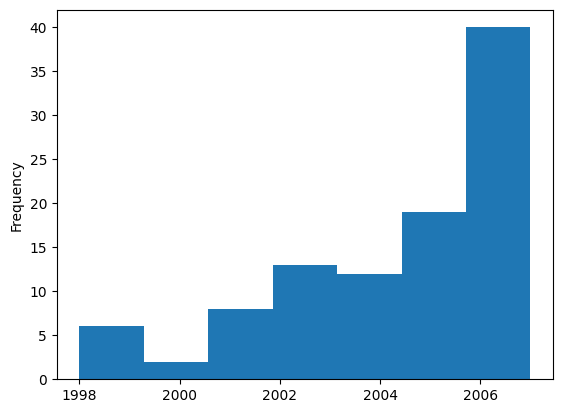

In [61]:
df_price['Release date'].plot.hist(bins=7)

This is a histogram of the 100 cheapest cameras in this dataset. This graph is skewed left, with a tail reaching 1998 and the mode near 2006 or 2007. Based off this graph, we can see that the 100 cheapest cameras in this dataset are released in the years 2005-2007, so we will focus on those camera models moving forward. 

In [64]:
#Distribution of release date: boxplot
df_release = df_price[df_price['Release date'] >= 2005]
df_release

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
902,Sigma SD14,2006,2640.0,1776.0,4.0,0.0,0.0,0.0,0.0,0.0,750.0,144.0,19.0
515,Nikon Coolpix L1,2005,2816.0,2048.0,6.0,38.0,190.0,50.0,4.0,10.0,195.0,90.0,99.0
516,Nikon Coolpix L10,2007,2560.0,2048.0,4.0,37.0,112.0,40.0,15.0,7.0,165.0,90.0,99.0
517,Nikon Coolpix L11,2007,2816.0,2048.0,6.0,37.0,112.0,40.0,15.0,7.0,175.0,90.0,99.0
518,Nikon Coolpix L12,2007,3072.0,2592.0,7.0,35.0,105.0,50.0,15.0,21.0,175.0,91.0,99.0
521,Nikon Coolpix L2,2006,2816.0,2048.0,6.0,38.0,116.0,30.0,10.0,23.0,170.0,91.0,99.0
522,Nikon Coolpix L3,2006,2592.0,2048.0,5.0,38.0,116.0,30.0,10.0,23.0,170.0,91.0,99.0
523,Nikon Coolpix L4,2006,2272.0,1600.0,3.0,38.0,114.0,30.0,4.0,10.0,165.0,87.0,99.0
524,Nikon Coolpix L5,2006,3072.0,2592.0,7.0,38.0,190.0,50.0,4.0,8.0,210.0,97.0,99.0
525,Nikon Coolpix L6,2006,2816.0,2048.0,6.0,38.0,116.0,30.0,10.0,23.0,175.0,91.0,99.0


In [65]:
print("There are " + str(len(df_release)) + " camera models that released in 2005 and after.") 

There are 59 camera models that released in 2005 and after.


<Axes: xlabel='Max resolution', ylabel='Price'>

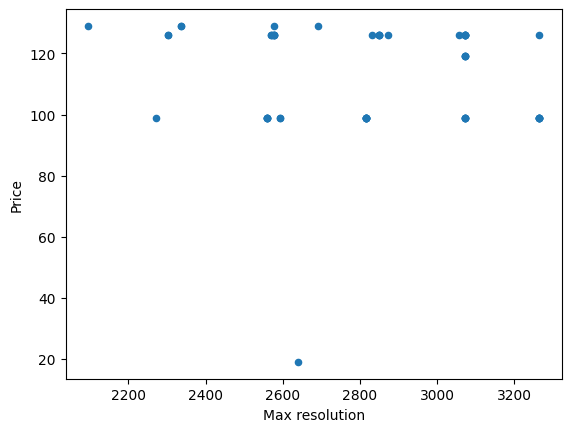

In [81]:
df_release.plot.scatter(x='Max resolution', y='Price')

From this scatterplot, we can see that these 59 camera models have max resolution ranging from 2200-3200 PPI, but stay in a consistent price range of about 100-130 dollars. There is one camera that is priced around 20 dollars, which seems like an outlier. Overall, from this scatterplot we can see that there is not necessarily a relationship between a camera's max resolution and its price -- a higher max resolution does not necessarily mean it is priced higher, and vice versa. In addition, when it comes to photography, a difference of 2200 PPI and 3200 PPI isn't that significant -- 3200 PPI is what's often used in video-editing and gaming, and that high of a res is not necessary for photography but can be nice. Since we can a camera of 2200 res at the same price as a camera with 3200 res, we can use one more filter: the storage that the camera offers. 

<Axes: xlabel='Max resolution', ylabel='Storage included'>

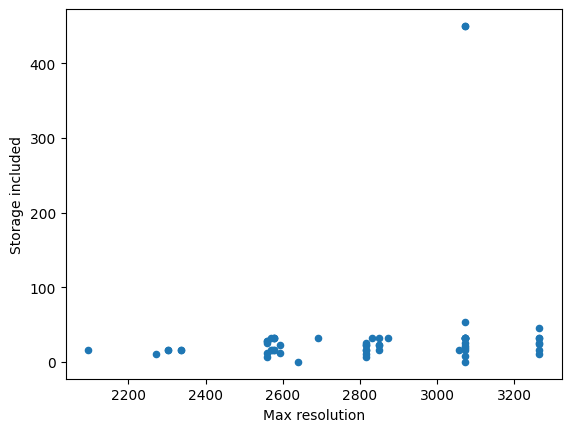

In [91]:
df_release.plot.scatter(x='Max resolution', y='Storage included')

From this scatterplot, we can see that these 58 out of 59 camera models, or 98.3% of these camera models, have less than 100 GB of storage. There is one outlier at around (3100, 450), or 3100 megapixels and 400 GB of storage. We know from the above graphs that the price is mostly the same for all these camera models and the resolution range here is not too significant, so all we care about here is which camera model offers the most storage. That would be the outlier in this scatterplot.

<h1>Section 4: Planning for Part II</h1>

Through my Exploratory Data Analysis of my dataset, I've observed that price and maximum resolution surprisngly don't have much relation to each other in these camera models. However, we did observe that for only the 59 models we narrowed down by release date -- I wonder if that is the case for all camera models in this dataset. In addition, I am curious to know which factors impact the camera's affordability the most – if not maximum resolution, is it storage? Weight of the camera? Some other camera property listed in the dataset? I would also be interested in knowing which factors matter most to other people interested in photography, either those who edit photos, also do photography, or simply like looking at photos. I can obtain that data by polling or sampling. 